In [ ]:
%matplotlib inline
#Magic para mostrar imágenes en Jupyter usando matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#cv2.IMREAD_COLOR : Carga la imagen a color, omitiendo transparencias. Es la bandera por defecto.
#cv2.IMREAD_GRAYSCALE : Carga la imagen en escala de grises.
#cv2.IMREAD_UNCHANGED : Carga la imagen como tal, incluyendo el canal alpha si existe.

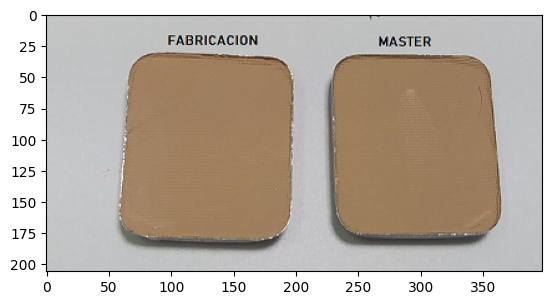

In [ ]:
#Se lee la imagen a color (recordar que se lee en BGR en opencv)
img = cv2.imread("Master.png", cv2.IMREAD_COLOR)  #cmap= gray, hot, jet...
#Se transforma de BGR a RGB (utilizando la función cvtColor con el parámetro COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img) # Promedio de las areas y hacer la comparación de valores

(206, 398, 3)


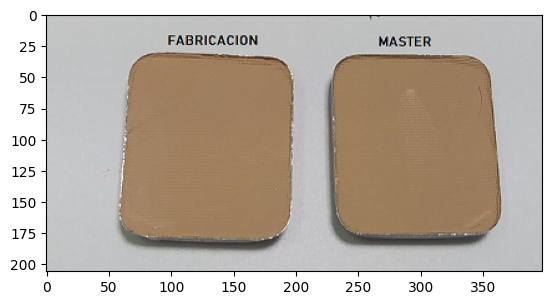

In [ ]:
#Leer la imagen en BGR
img = cv2.imread("Master.png", cv2.IMREAD_COLOR)
#La convierte a RGB
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)

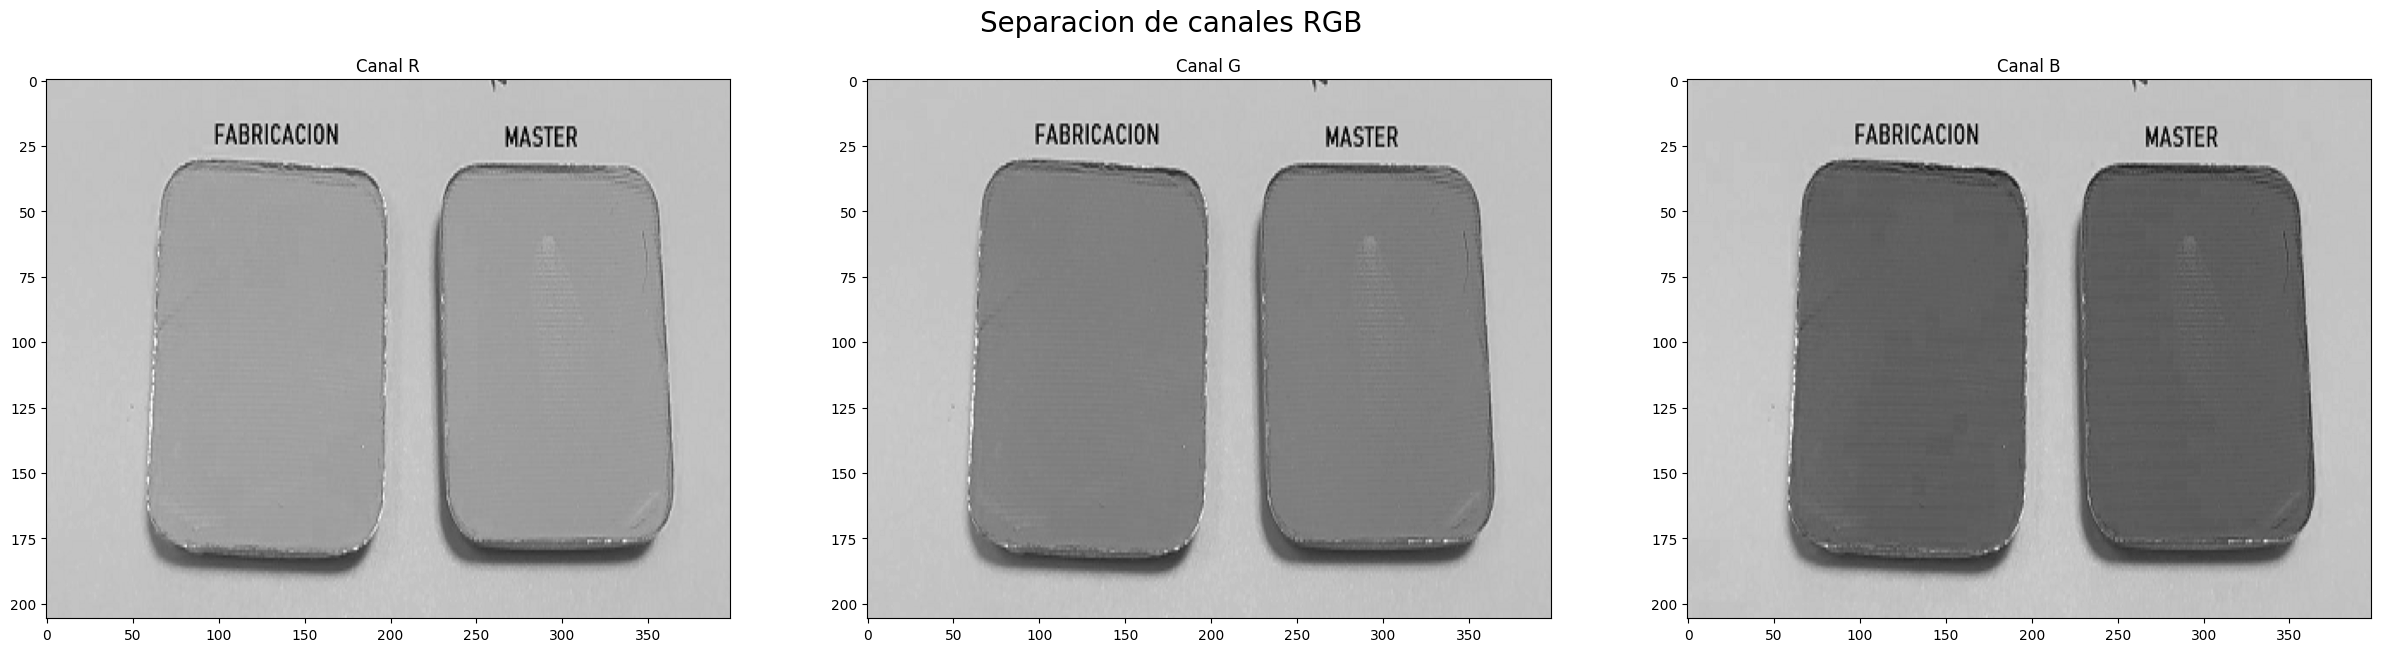

In [ ]:
#Como se vio antes, los canales R, G y B se pueden separar de la imagen original accediendo
#en forma de indices
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se crea el subplot 1x3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 7))
#Se ponen títulos y se muestran las imágenes
fig.suptitle('Separacion de canales RGB', fontsize=20)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray', aspect='auto')

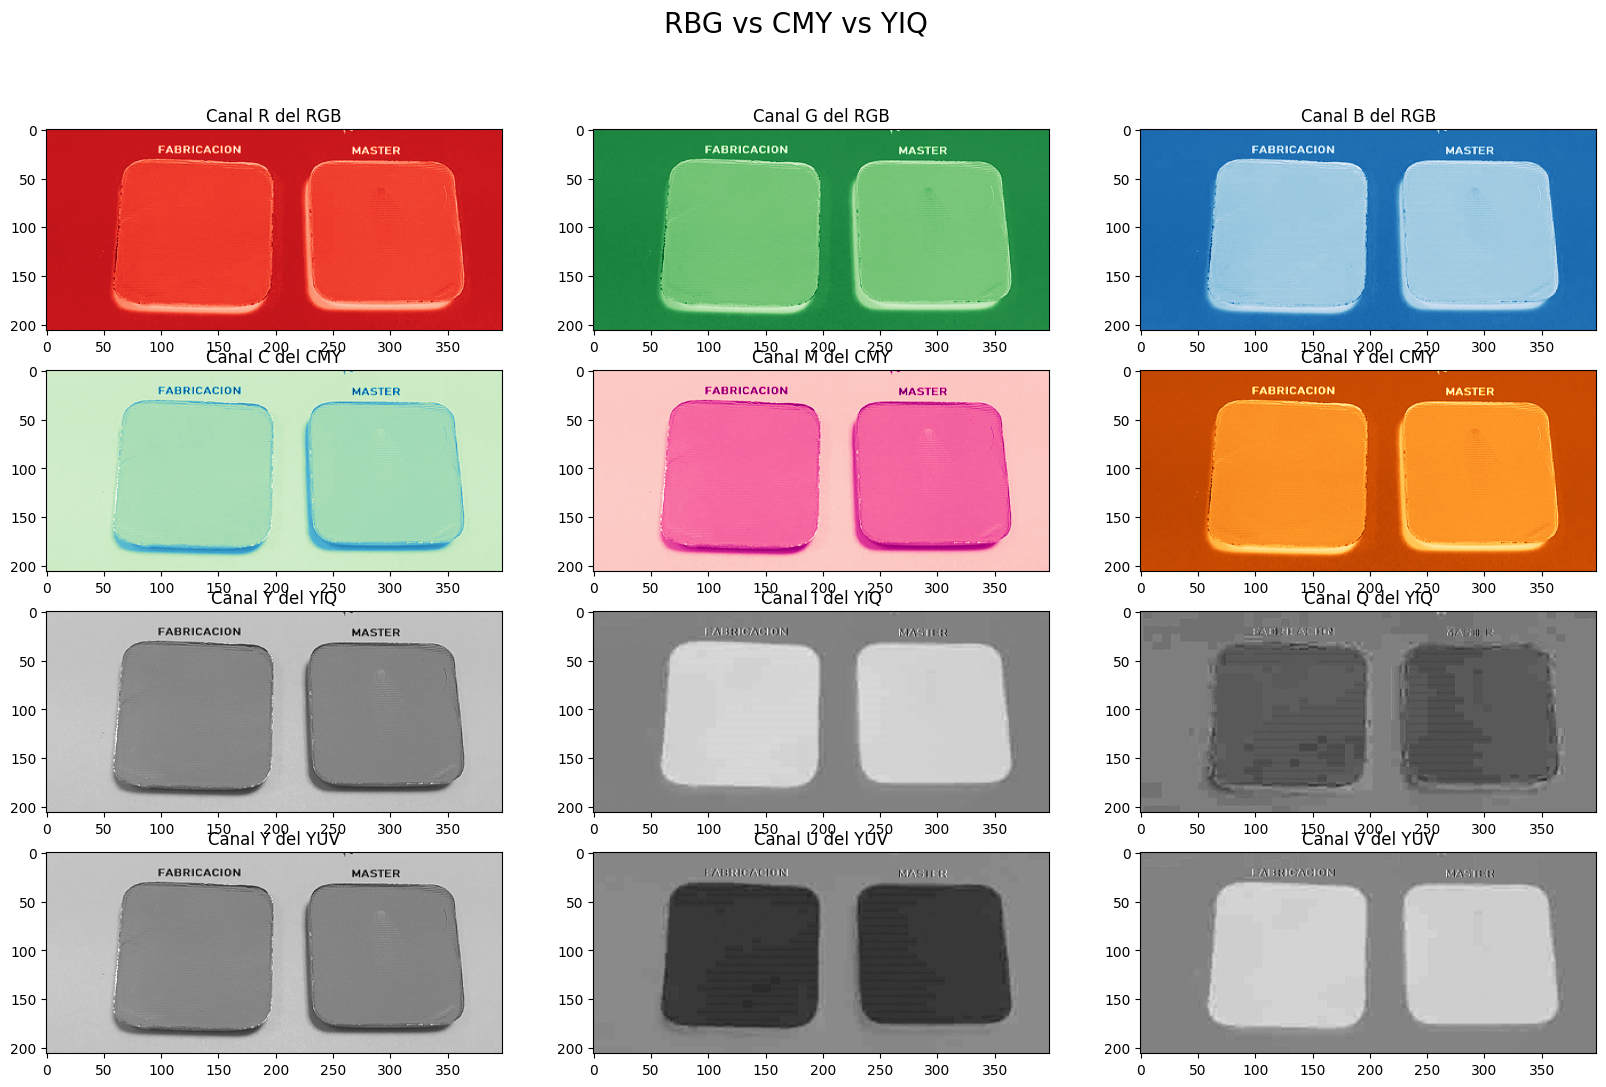

In [ ]:
#Aquí se descompone cada canal de la imagen
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
img_C = 255 - img_rgb[:,:,0]
img_M = 255 - img_rgb[:,:,1]
img_Y = 255 - img_rgb[:,:,2]

#Se obtienen los canales YIQ mediante una transformación lineal
img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

#Separar el espacio de color YUV en sus canales individuales
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]



#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(20, 12))
fig.suptitle('RBG vs CMY vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(img_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(img_M, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(img_Y, cmap='YlOrBr', aspect='auto')
ax7.set_title('Canal Y del YIQ')
ax7.imshow(img_Y, cmap='gray', aspect='auto')
ax8.set_title('Canal I del YIQ')
ax8.imshow(img_I, cmap='gray', aspect='auto')
ax9.set_title('Canal Q del YIQ')
ax9.imshow(img_Q, cmap='gray', aspect='auto')
ax10.set_title('Canal Y del YUV')
ax10.imshow(img_Y, cmap='gray', aspect='auto')
ax11.set_title('Canal U del YUV')
ax11.imshow(img_U, cmap='gray', aspect='auto')
ax12.set_title('Canal V del YUV')
ax12.imshow(img_V, cmap='gray', aspect='auto')

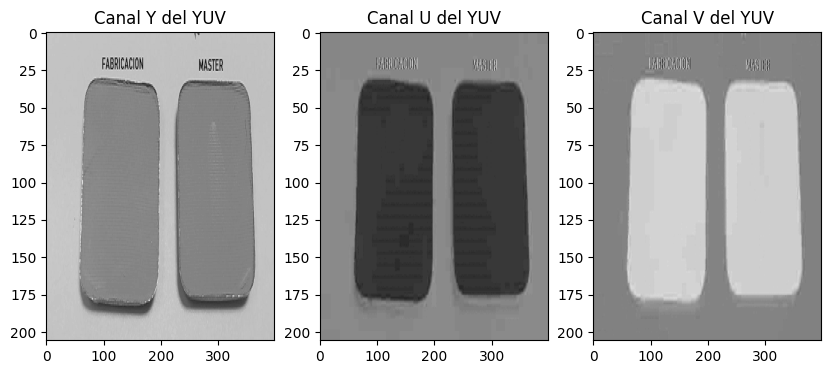

In [ ]:
#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))
ax1.set_title('Canal Y del YUV')
ax1.imshow(img_Y, cmap='gray', aspect='auto')
ax2.set_title('Canal U del YUV')
ax2.imshow(img_U, cmap='gray', aspect='auto')
ax3.set_title('Canal V del YUV')
ax3.imshow(img_V, cmap='gray', aspect='auto')

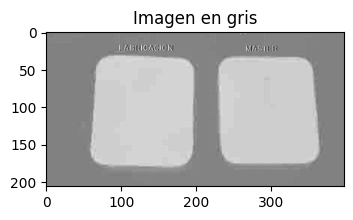

In [ ]:
img=cv2.imread("Master.png", cv2.IMREAD_COLOR)



#Generar un subplot 1x3 que muestre imagen en gris, histograma y multi-umbralización
fig, ax = plt.subplots(1,1, figsize=(10, 2))

ax.set_title('Imagen en gris')
ax.imshow(img_V, cmap='gray')

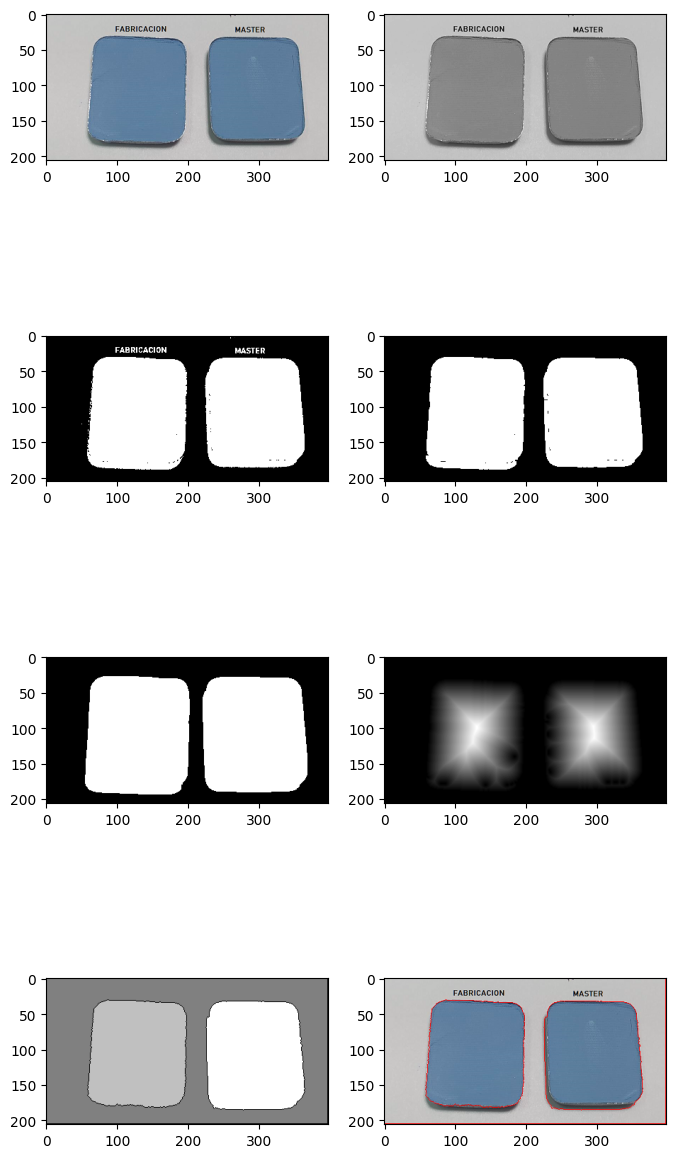

In [ ]:
import copy

#Leer imagen de entrada y convertirla a escala de grises
img = cv2.imread("Master.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Aplicar una umbralización OTSU
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=4)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
final=copy.deepcopy(img)
final[markers == -1] = [255,0,0]


images = [img, gray, thresh,opening,sure_bg,dist_transform,sure_fg,unknown,markers,final]

fig, ax = plt.subplots(4,2, figsize=(8, 16))
ax[0][0].imshow(img, cmap='gray')
ax[0][1].imshow(gray, cmap='gray')
ax[1][0].imshow(thresh, cmap='gray')
ax[1][1].imshow(opening, cmap='gray')
ax[2][0].imshow(sure_bg, cmap='gray')
ax[2][1].imshow(dist_transform, cmap='gray')
ax[3][0].imshow(markers, cmap='gray')
ax[3][1].imshow(final, cmap='gray')

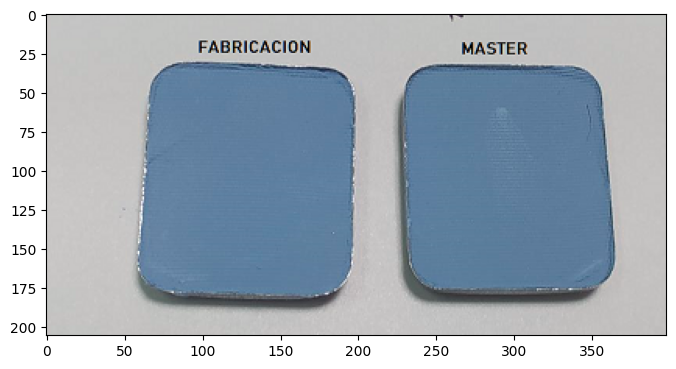

In [ ]:
Original = cv2.imread("Master.png", cv2.IMREAD_COLOR)
fig, ax = plt.subplots(1,1, figsize=(8, 16))
ax.imshow(Original, cmap='gray')

Text(0.5, 1.0, 'Resta')

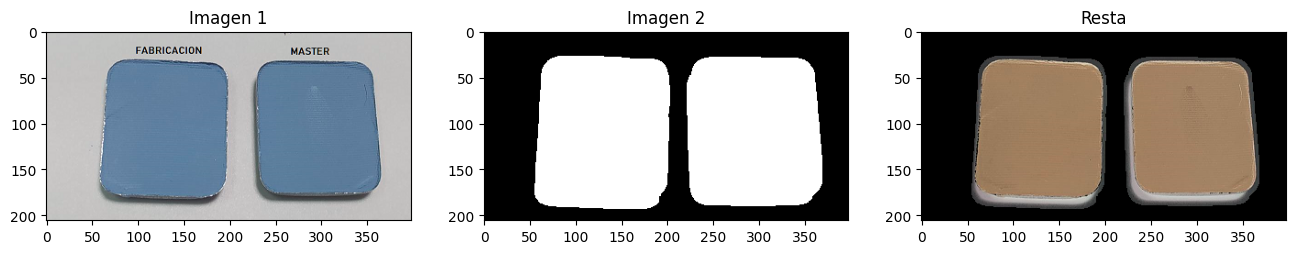

In [ ]:
img1=Original   #
img2=sure_bg    #Umbraliz
img2=thresh
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

#Realizar la operación resta y darle el tipo de dato uint8
res = cv2.subtract(img2,img1).astype(np.uint8)

#Generar una figura 1x3 y mostrar imágenes de entrada y la resta de las mismas
fig = plt.figure(figsize=(16,26))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")


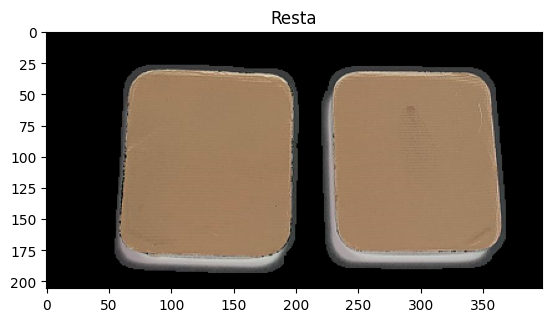

In [ ]:

plt.imshow(res,cmap='gray')
plt.title("Resta")
plt.savefig("Prueba.png")

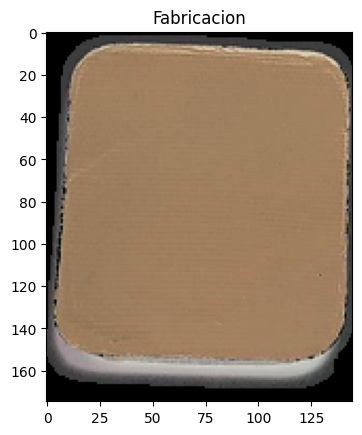

In [ ]:
test=res[25:200,55:200]
plt.imshow(test,cmap='gray')
plt.title("Fabricacion")
plt.savefig("Fabricacion.png")

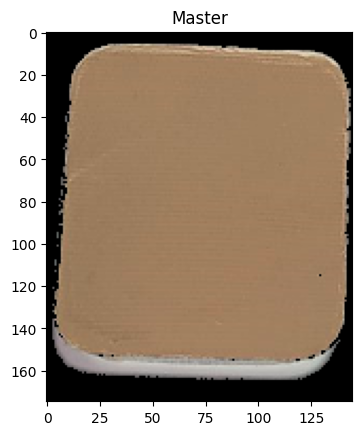

In [ ]:
test2=res[25:200,225:370]
plt.imshow(test,cmap='gray')
plt.title("Master")
plt.savefig("Master.png")

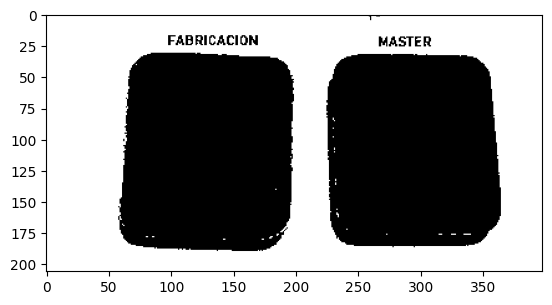

In [ ]:
#Implementación de otra versión (probabilistica) de la transformada de Hough para lineas.

#Importar librerías
import cv2
import numpy as np
from matplotlib import pyplot as plt

import skimage.morphology as morph
# Aplicar operaciones morfológicas


#Leer imagen de entrada
img = cv2.imread('Master.png',cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_, thresh_1 = cv2.threshold(img[:,:,1], 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_1,cmap='gray')






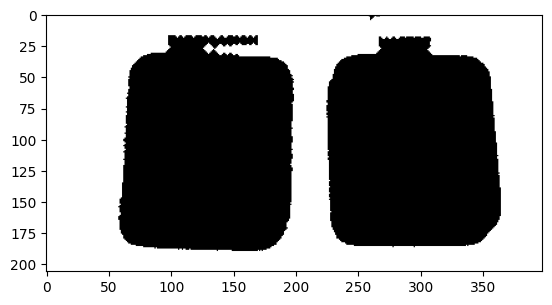

In [ ]:
import skimage.morphology as morph
# Aplicar operaciones morfológicas

# Kernel de disco
kernel = morph.disk(2)

# Aplicar apertura
apertura = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, kernel, iterations = 2)

plt.imshow(apertura,cmap='gray')

1


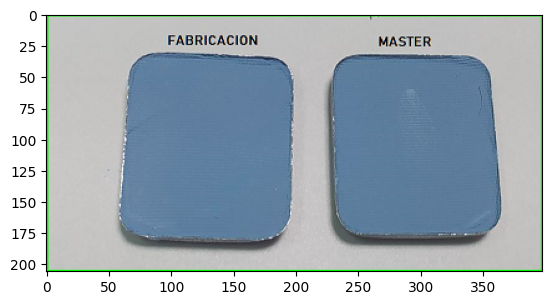

In [ ]:
# find contours
contours, hierarchy = cv2.findContours(thresh_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Mostrar el numero de contornos encontrados
print(len(contours))
# Recorro todos los contornos encontrados
for c in contours:
    x,y,w,h = cv2.boundingRect(c) # Encuentro el rectángulo que engloba al contorno
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) # Dibujo el rectángulo en la imagen original

plt.imshow(img,cmap='gray')

In [ ]:
#Cordenadas
alto,ancho,dim=img.shape
x=203
y=202
x1=14
y1=13


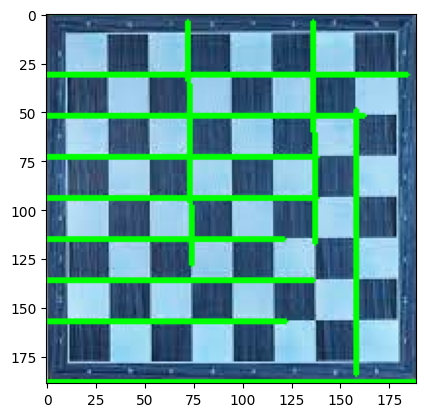

In [ ]:
#Mostrar la imagen
#img[x1:x,y1:y]
plt.imshow(img[x1:x,y1:y],cmap='gray')
#plt.scatter([x,x1],[y,y1])

In [ ]:
# Importamos librerias
import cv2
import numpy as np

# Cargamos el modelo COCO 80 clases
rcnn = cv2.dnn.readNetFromTensorflow('frozen_inference_graph_coco.pb',
                                     'mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')

# Leemos la imagen
img = cv2.imread('Master.png')
alto, ancho, dim =  img.shape
#print(alto, ancho)

# Generamos los colores
colores = np.random.randint(0, 255, (80,3))

# Alistamos nuestra imagen
blob = cv2.dnn.blobFromImage(img, swapRB = True) # Swap: BGR -> RGB

# Procesamos la imagen
rcnn.setInput(blob)

# Extraemos los Rect y Mascaras
info, masks = rcnn.forward(["detection_out_final", "detection_masks"])

# Extraemos la cantidad de objetos detectados
contObject = info.shape[2]
#print(contObject)



In [ ]:
contObject = info.shape[2]
contObject

100

In [ ]:
objeto=[ 0.        , 73.        ,  0.5891836 ,  0.5705831 ,
           0.09675568,  0.92745256,  0.8938345 ]

In [ ]:
# Coordenadas del Rectangulos para deteccion de objetos
y = int(objeto[3] * ancho)+22
x = int(objeto[4] * alto)+22
y2 = int(objeto[5] * ancho)-22
x2 = int(objeto[6] * alto)-22


In [ ]:
x,y,x2,y2,img.shape

(41, 249, 162, 347, (206, 398, 3))

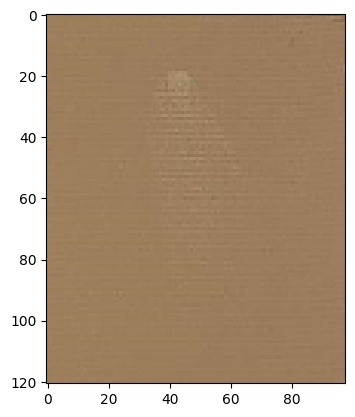

In [ ]:
#Se lee la imagen a color (recordar que se lee en BGR en opencv)
img = cv2.imread("Master.png", cv2.IMREAD_COLOR)  #cmap= gray, hot, jet...
#Se transforma de BGR a RGB (utilizando la función cvtColor con el parámetro COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img[x:x2,y:y2],cmap='gray')

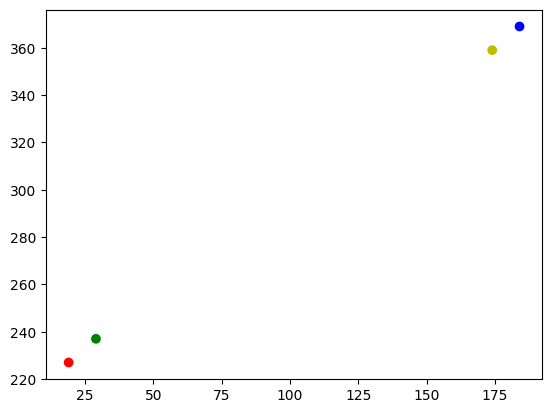

In [ ]:
plt.scatter([x,x2,x+10,x2-10],[y,y2,y+10,y2-10],color=["r","b","g","y"])
